# NetworkX Introduction - Part 2

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Input/Output

There are several functions for reading and writing graphs. The following tabkle summarizes their properties.



In [2]:
import io

tabletext ="""
Format, Attributes, Reader, Writer
Adjacency list, Not stored, nx.read_adjlist(), nx.write_adjlist()
Edge list, Not stored, nx.read_edgelist(), nx.write_edgelist()
Graph exchange XML format, Stored, nx.read_gexf(), nx.write_gexf()
Graph modeling language, Stored, nx.read_gml(), nx.write_gml()
GraphML, Stored, nx.read_graphml(), nx.write_graphml()
Pajek NET, Not stored, nx.read_pajek(), nx.write_pajek()
Pickle, Stored, nx.read_gpickle(), nx.write_gpickle()
YAML, Stored, nx.read_yaml(), nx.write_yaml()"""

tabletextIO = io.StringIO(tabletext)

tb = pd.read_csv(tabletextIO)
tb

,Format,Attributes,Reader,Writer
0,Adjacency list,Not stored,nx.read_adjlist(),nx.write_adjlist()
1,Edge list,Not stored,nx.read_edgelist(),nx.write_edgelist()
2,Graph exchange XML format,Stored,nx.read_gexf(),nx.write_gexf()
3,Graph modeling language,Stored,nx.read_gml(),nx.write_gml()
4,GraphML,Stored,nx.read_graphml(),nx.write_graphml()
5,Pajek NET,Not stored,nx.read_pajek(),nx.write_pajek()
6,Pickle,Stored,nx.read_gpickle(),nx.write_gpickle()
7,YAML,Stored,nx.read_yaml(),nx.write_yaml()


In [3]:
!type adjlist.txt

/bin/sh: line 0: type: adjlist.txt: not found


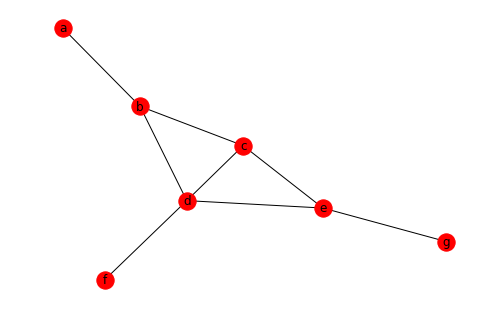

In [5]:
from pathlib import Path

# adjlist = \
# """a b
# b c d
# c b e 
# d c e f
# e c d g
# f d
# """
#
# f = open('adjlist.txt','w')
# f.write(adjlist)

G = nx.read_adjlist('adjlist.txt')
nx.draw(G,with_labels=True)

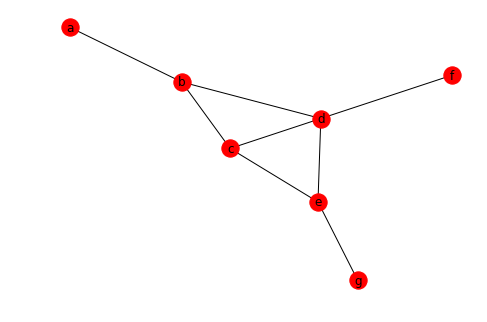

In [24]:
edgelist = \
"""a b
b c 
b d
c b 
c e 
d c 
d e 
d f
e c 
e d 
e g
f d
"""

f = open('edgelist.txt','w')
f.write(edgelist)

G = nx.read_edgelist('edgelist.txt')

nx.draw(G,with_labels=True)

When we have the text representation in a list of strings, we can use function `nx.parse_...()`.

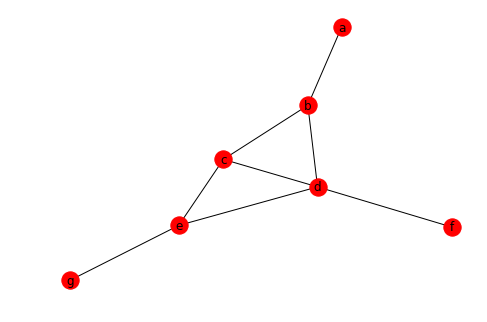

In [7]:
edgelist = ["a b",
"b c", 
"b d",
"c b",
"c e", 
"d c", 
"d e", 
"d f",
"e c", 
"e d", 
"e g",
"f d"
]

G = nx.parse_edgelist(edgelist)

nx.draw(G,with_labels=True)

Graph: [1, 2, 3, 4, 5, 6, 7]
Edges: [(1, 2, {'Weight': 1.0}), (2, 3, {'Weight': 2.0}), (2, 4, {'Weight': 3.2}), (3, 4, {'Weight': 1.7}), (3, 5, {'Weight': 2.3}), (4, 5, {'Weight': 1.3}), (4, 6, {'Weight': 0.4}), (5, 7, {'Weight': 2.0})]


{(1, 2): Text(-0.669396,0.314918,"{'Weight': 1.0}"),
 (2, 3): Text(-0.200071,0.188241,"{'Weight': 2.0}"),
 (2, 4): Text(-0.235131,0.00278935,"{'Weight': 3.2}"),
 (3, 4): Text(-0.000936122,-0.00197675,"{'Weight': 1.7}"),
 (3, 5): Text(0.253535,0.101014,"{'Weight': 2.3}"),
 (4, 5): Text(0.218475,-0.0844379,"{'Weight': 1.3}"),
 (4, 6): Text(-0.0841395,-0.450669,"{'Weight': 0.4}"),
 (5, 7): Text(0.736473,0.044014,"{'Weight': 2.0}")}

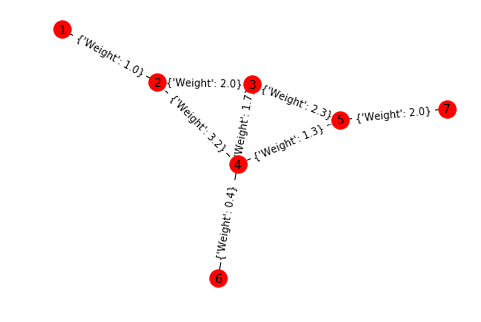

In [8]:
w_edgelist = [
"1 2 1.0",
"2 3 2.0",
"2 4 3.2",
"3 4 1.7",
"3 5 2.3",
"4 5 1.3",
"4 6 0.4",
"5 7 2.0"
]

G = nx.parse_edgelist(w_edgelist, nodetype = int, data=[('Weight', float)])
print('Graph:',list(G))

print('Edges:',list(G.edges(data=True)))

pos = nx.spring_layout(G)
nx.draw(G,pos=pos,with_labels=True)
nx.draw_networkx_edge_labels(G,pos=pos)

## Pandas

Graphs can be built also from Pandas tables (called dataframe) containing list od edges. Do not forget to import pandas.

In [9]:
import pandas as pd

In [10]:
G_df = pd.read_csv('w_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['u', 'v', 'weight'])
G_df

,u,v,weight
0,1,2,1.0
1,2,3,2.0
2,2,4,3.2
3,3,4,1.7
4,3,5,2.3
5,4,5,1.3
6,4,6,0.4
7,5,7,2.0


In [27]:
chess = nx.read_edgelist('chess_graph.txt',data = [('result',int),('time',float)], create_using = nx.MultiDiGraph)

In [29]:
chess

In [30]:
print(chess.nodes)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

Answer the following questions using the `chess` network:

1. The nuber of nodes, the number of edges.
2. Which player played the maximal number of games.
3. Which player won the maximal number of games.
